# Egg Production Optimization Project

## Author: Dravyn, Jasmin, Jeff, Oleks

#### Original Dataset: Md Anowar Hossen Faysal, Md Rasel Ahmed, Md Masudur Rahaman

#### Dataset: https://www.kaggle.com/datasets/faysal1998/environmental-effect-on-egg-production
1. Amount_of_chicken: The number of chickens in the farm or enclosure.

2. Amount_of_Feeding: The quantity of food fed to the chickens, likely in kilograms or pounds.

3. Ammonia: Ammonia level in the chicken coop or enclosure. Ammonia is a gas that is produced by the decomposition of chicken waste and can be harmful to chickens in high concentrations.

4. Temperature: The temperature inside the chicken coop or enclosure, measured in degrees Celsius (C).

5. Humidity: The humidity inside the chicken coop or enclosure, measured in percentage.

6. Light_Intensity: The intensity of light in the chicken coop or enclosure.

7. Noise: The noise level in the chicken coop or enclosure, measured in decibels (dB).

8. Total_egg_production: The total number of eggs produced by the chickens.


**Missing Values** <br>
None

## Look at the Big Picture

### Frame the Problem
- Our machine learning algorithm is supervised. 
- Given that our data is numeric, this is a regression task. 
- Our algorithm will also use batch learning techniques.

In [278]:
# Import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
# Download the dataset
url = "https://raw.githubusercontent.com/ItsJJH/egg-ai-project/master/Egg_Production.csv"
eggs = pd.read_csv(url, sep=',')

### Data Cleaning

In [280]:
# Number of duplicates
print(f'Number of duplicate instances: {eggs.duplicated().sum()}')

Number of duplicate instances: 407


In [281]:
# Removing duplicates
eggs.drop_duplicates(inplace=True)
eggs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     74 non-null     int64  
 1   Amount_of_Feeding     74 non-null     int64  
 2   Ammonia               74 non-null     float64
 3   Temperature           74 non-null     float64
 4   Humidity              74 non-null     float64
 5   Light_Intensity       74 non-null     int64  
 6   Noise                 74 non-null     int64  
 7   Total_egg_production  74 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 5.2 KB


In [282]:
# Ensure no duplicates
eggs

,Amount_of_chicken,Amount_of_Feeding,Ammonia,Temperature,Humidity,Light_Intensity,Noise,Total_egg_production
0,2728,170,14.4,29.3,51.7,364,214,2115
1,2728,175,17.6,29.3,52.3,369,235,1958
2,2728,175,15.0,29.3,52.5,373,237,1990
3,2728,170,15.0,29.3,49.7,372,240,2015
4,2728,170,15.9,29.2,51.4,381,237,2112
...,...,...,...,...,...,...,...,...
69,2721,170,17.9,29.2,50.6,320,209,2015
70,2721,170,14.0,29.2,50.7,310,201,2063
71,2721,190,13.8,29.1,53.1,318,81,2065
72,2721,190,14.3,29.1,54.1,318,81,2050


In [283]:
# Ensure no missing values
eggs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Amount_of_chicken     74 non-null     int64  
 1   Amount_of_Feeding     74 non-null     int64  
 2   Ammonia               74 non-null     float64
 3   Temperature           74 non-null     float64
 4   Humidity              74 non-null     float64
 5   Light_Intensity       74 non-null     int64  
 6   Noise                 74 non-null     int64  
 7   Total_egg_production  74 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 5.2 KB


### Graphs

#### Histogram

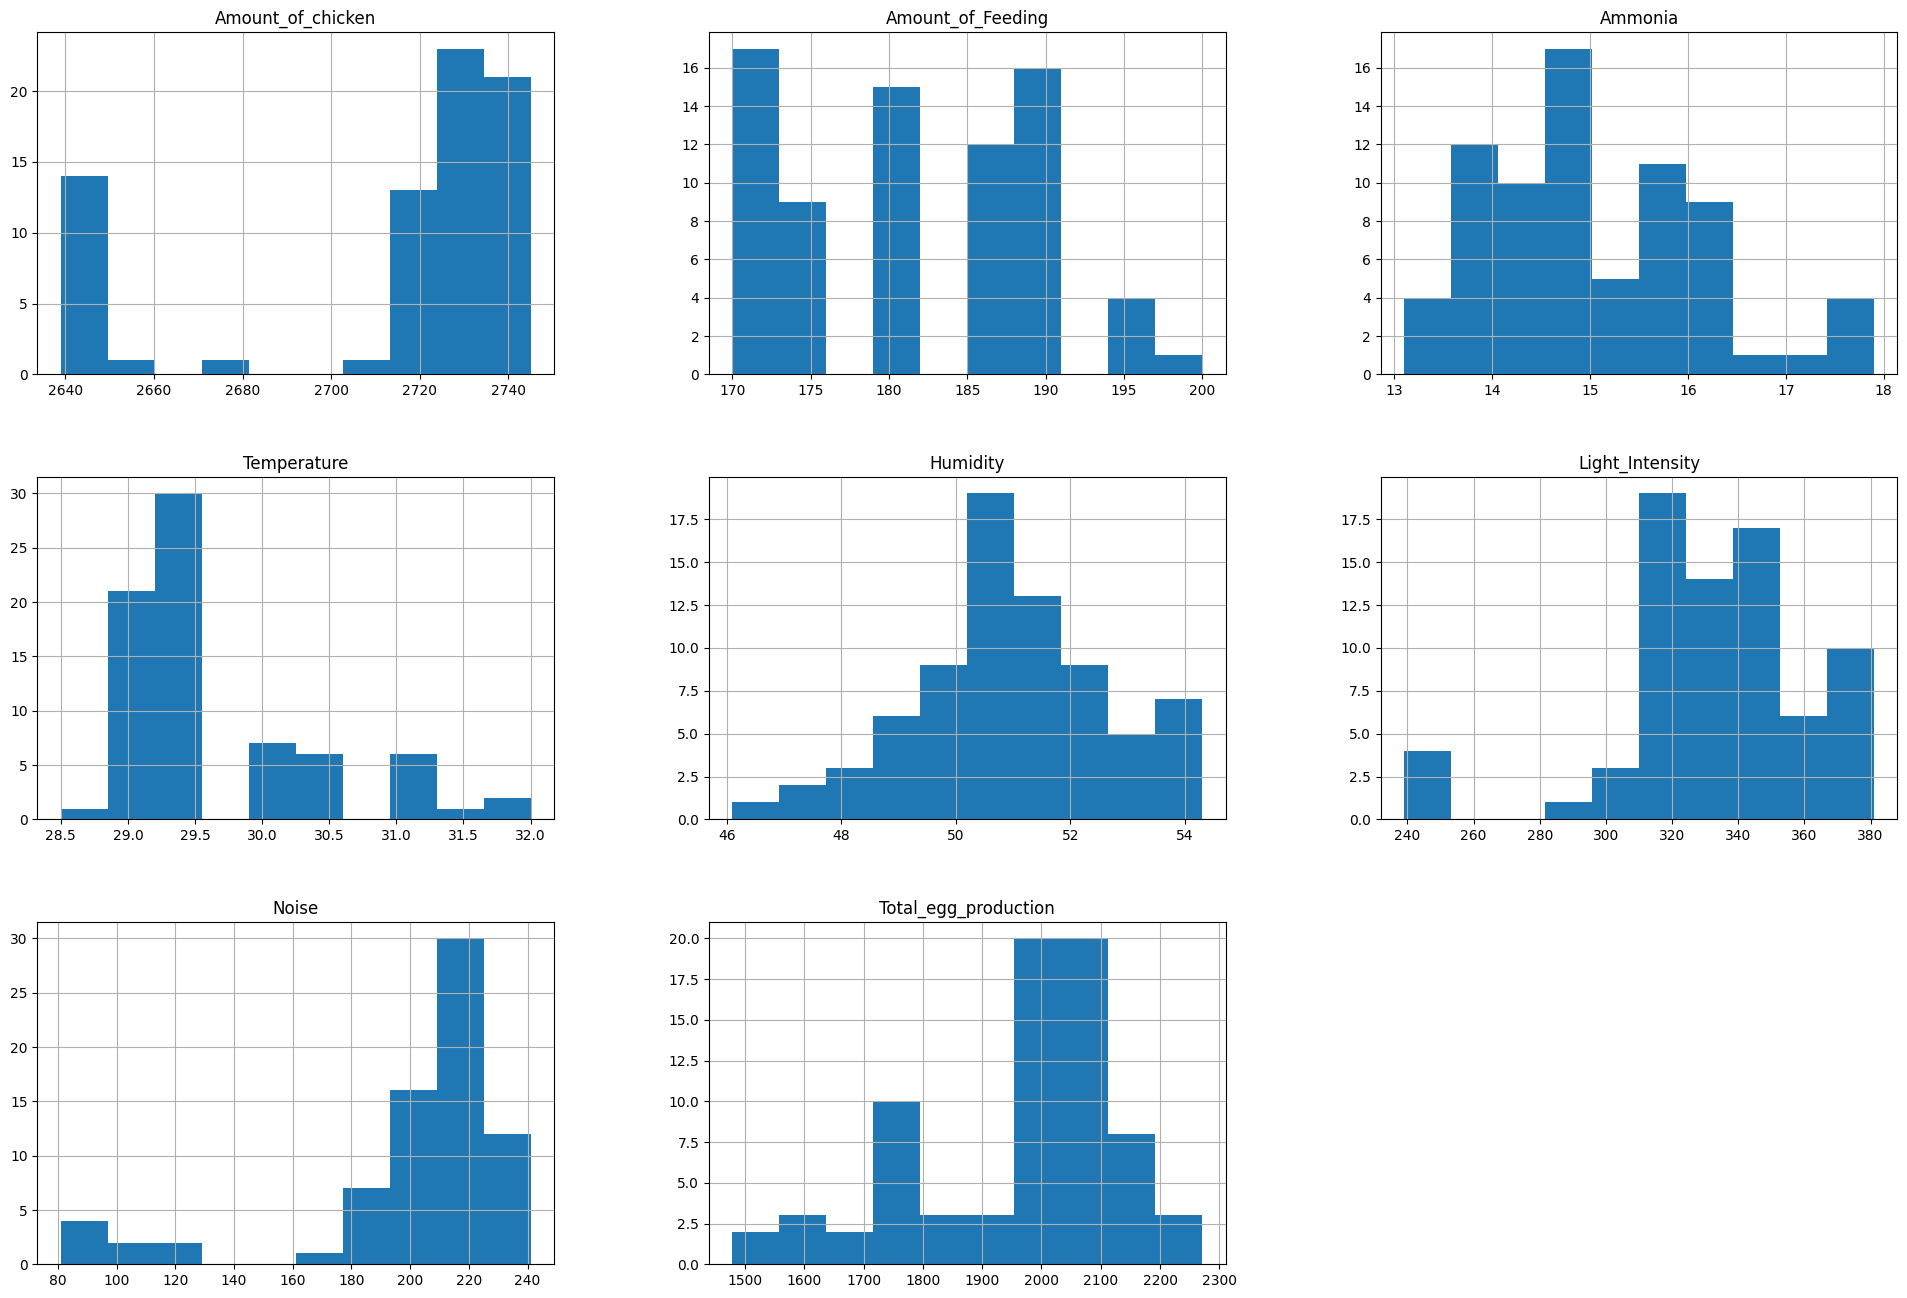

In [284]:
# Graph 1 - The Histogram
eggs.hist(figsize=(24, 16))
plt.show()

#### Pairplot

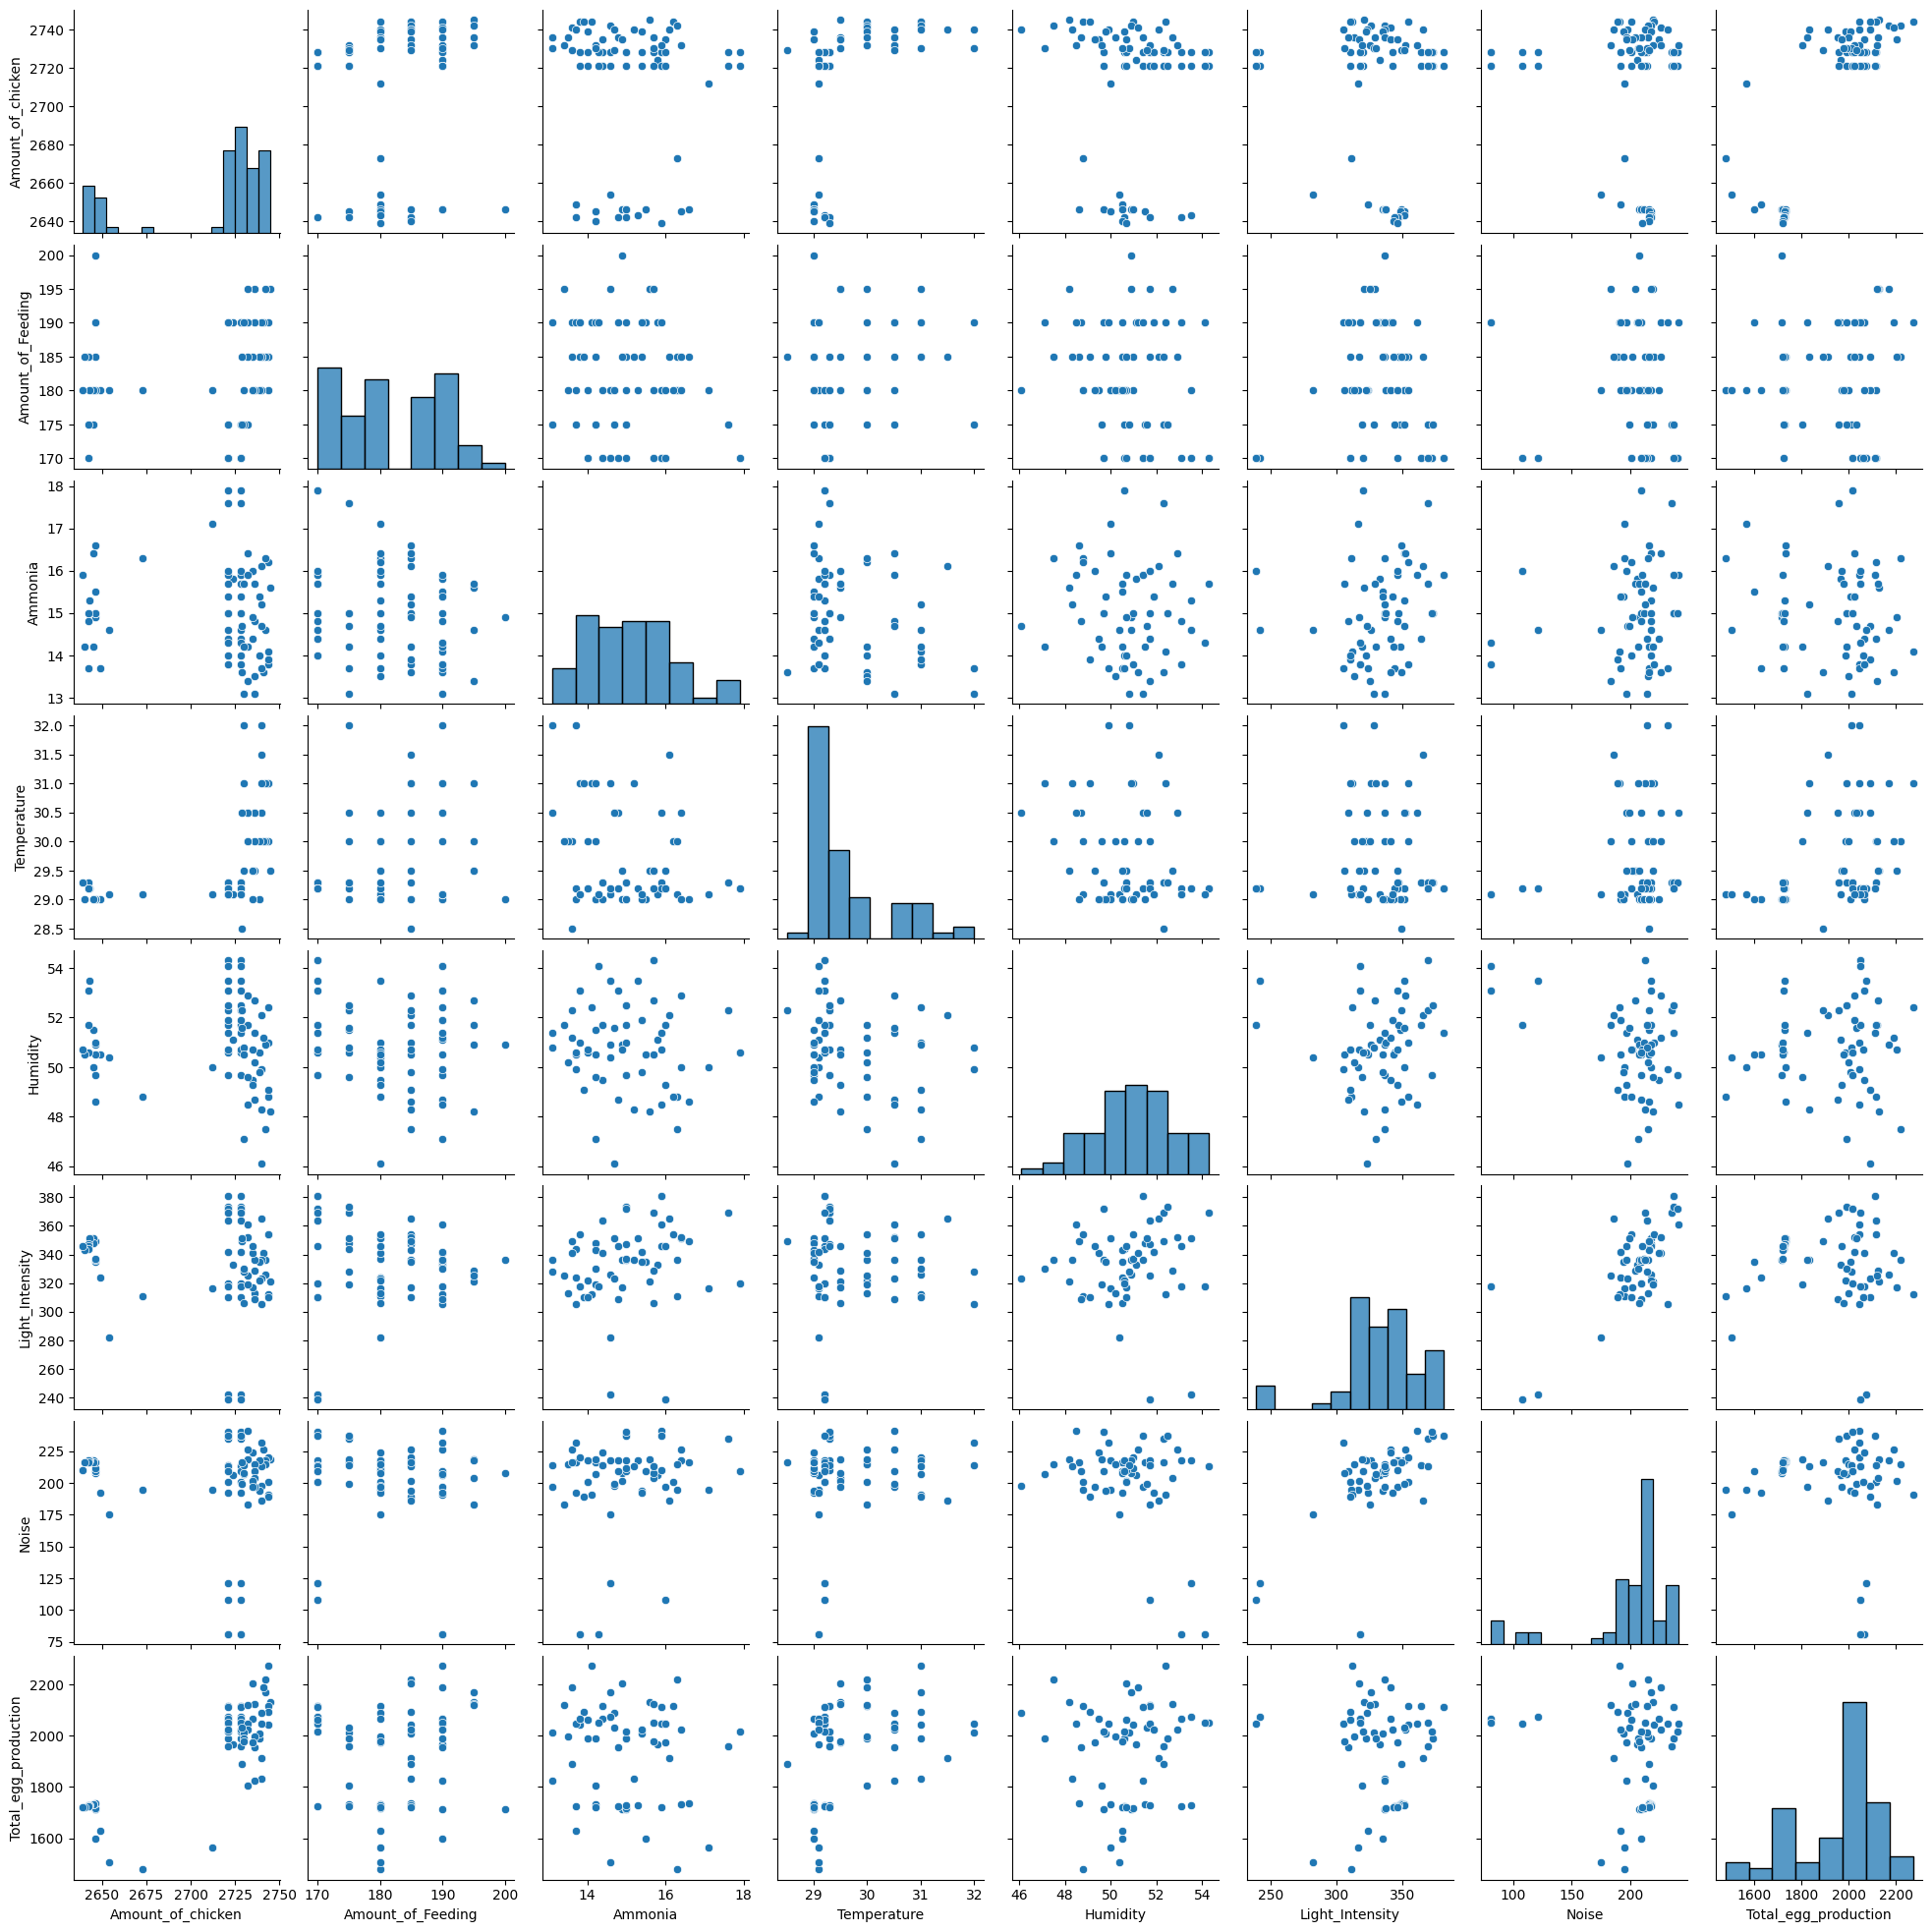

In [285]:
# Graph 2 - The Pairplot
sns.pairplot(eggs)

#### Correlation Heatmap

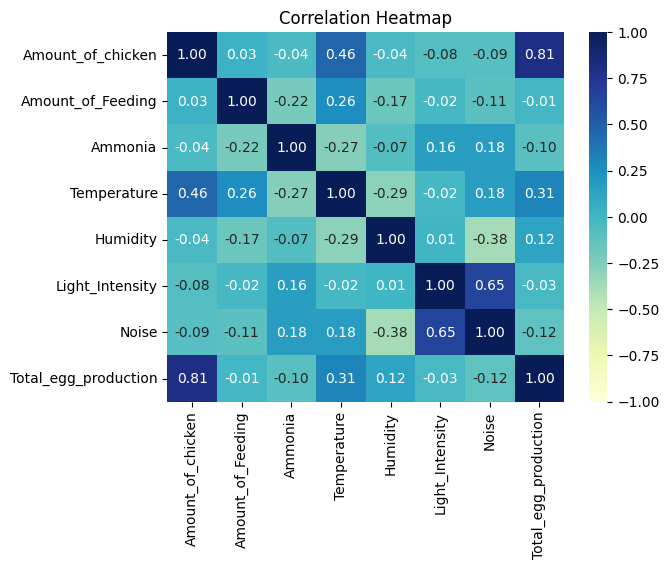

In [286]:
RANGE_MAX = 1
RANGE_MIN = -1

corr_matrix = eggs.corr()

sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, fmt='.2f', vmin=RANGE_MIN, vmax=RANGE_MAX)
plt.title('Correlation Heatmap')
plt.show()

###### Heatmap inspired by: https://www.kaggle.com/code/faysal1998/environmentaleffecteggproduction

## Pipeline

In [287]:
# Import libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [288]:
# Store columns
num_cols = eggs.select_dtypes(include='number').columns

# Make pipeline
num_pipeline = make_pipeline('num', MinMaxScaler(), num_cols)

# Preprocessing
preprocessing = ColumnTransformer([num_pipeline], remainder='passthrough')

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[Pipeline(steps=[('num', 'num'),
                                                ('minmaxscaler',
                                                 MinMaxScaler()),
                                                ('index',
                                                 Index(['Amount_of_chicken', 'Amount_of_Feeding', 'Ammonia', 'Temperature',
       'Humidity', 'Light_Intensity', 'Noise', 'Total_egg_production'],
      dtype='object'))])])

In [289]:
# Fit and transform dataframe
eggs_scaled = preprocessing.fit_transform(eggs)

# New scaled data set
feature_names = preprocessing.get_feature_names_out()
eggs_prepared = pd.DataFrame(data=eggs_scaled, columns=feature_names)

eggs_prepared

,num__Amount_of_chicken,num__Amount_of_Feeding,num__Ammonia,num__Temperature,num__Humidity,num__Light_Intensity,num__Noise,num__Total_egg_production
0,0.839623,0.000000,0.270833,0.228571,0.682927,0.880282,0.83125,0.803030
1,0.839623,0.166667,0.937500,0.228571,0.756098,0.915493,0.96250,0.604798
2,0.839623,0.166667,0.395833,0.228571,0.780488,0.943662,0.97500,0.645202
3,0.839623,0.000000,0.395833,0.228571,0.439024,0.936620,0.99375,0.676768
4,0.839623,0.000000,0.583333,0.200000,0.646341,1.000000,0.97500,0.799242
...,...,...,...,...,...,...,...,...
69,0.773585,0.000000,1.000000,0.200000,0.548780,0.570423,0.80000,0.676768
70,0.773585,0.000000,0.187500,0.200000,0.560976,0.500000,0.75000,0.737374
71,0.773585,0.666667,0.145833,0.171429,0.853659,0.556338,0.00000,0.739899
72,0.773585,0.666667,0.250000,0.171429,0.975610,0.556338,0.00000,0.720960


#### Boxplot

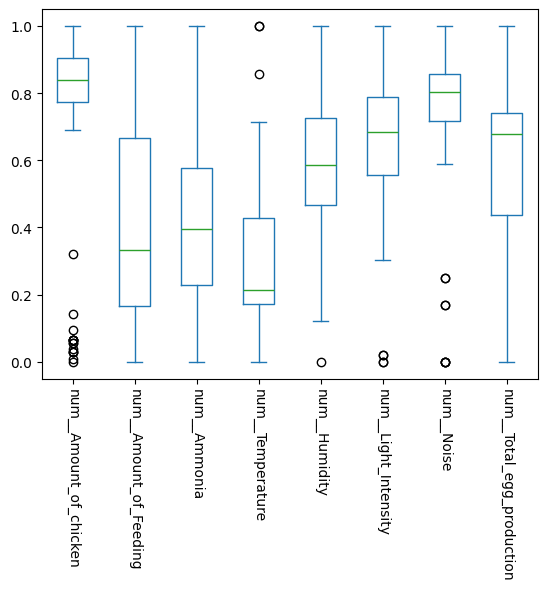

In [290]:
eggs_prepared.plot.box()
plt.xticks(rotation = -90)
plt.show()

In [291]:
# Verifying that dataframe has been scaled properly
print(eggs_prepared.min(), '\n')
print(eggs_prepared.max())

num__Amount_of_chicken       0.0
num__Amount_of_Feeding       0.0
num__Ammonia                 0.0
num__Temperature             0.0
num__Humidity                0.0
num__Light_Intensity         0.0
num__Noise                   0.0
num__Total_egg_production    0.0
dtype: float64 

num__Amount_of_chicken       1.0
num__Amount_of_Feeding       1.0
num__Ammonia                 1.0
num__Temperature             1.0
num__Humidity                1.0
num__Light_Intensity         1.0
num__Noise                   1.0
num__Total_egg_production    1.0
dtype: float64


In [292]:
corr_matrix["Total_egg_production"].sort_values(ascending=False)

Total_egg_production    1.000000
Amount_of_chicken       0.810808
Temperature             0.311872
Humidity                0.120340
Amount_of_Feeding      -0.011042
Light_Intensity        -0.031182
Ammonia                -0.098338
Noise                  -0.122887
Name: Total_egg_production, dtype: float64

### Splitting Dataset into Train/Validation

In [293]:
TEST_SIZE =  0.20
TRAIN_SIZE = 1 - TEST_SIZE
SEED = None # Make 'None' type to randomize

#### Splitting Training Set

In [294]:
from sklearn.model_selection import train_test_split

# Remove and save target feature
X = eggs_prepared.drop(["num__Total_egg_production"], axis=1)
y = eggs_prepared["num__Total_egg_production"]

# Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=TEST_SIZE, 
                                      train_size=TRAIN_SIZE, 
                                      random_state=SEED, 
                                      shuffle=True)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(59, 7) (59,) (15, 7) (15,)


## Models

### Utility Methods

#### Range Plot

In [295]:
def make_rangeplot(predictions: np.ndarray, actual_values=y_test, title='', x_labels=None,axs=None):
    """ Makes a rangeplot 
    
    Takes 2 np.ndarray's of numbers and makes a rangeplot with their differences
    Takes optional title
    """
    bottoms = np.minimum(predictions, actual_values)
    tops = np.maximum(predictions, actual_values)

    diff = np.subtract(tops, bottoms)

    x = np.arange(len(bottoms))
    
    axs.bar(x, diff, bottom=bottoms)
    title += ' Rangeplot'
    axs.set_ylabel('Prediction Value')
    axs.set_xlabel('Prediction Number')
    axs.set_xticks(x, x_labels)
    axs.set_title(title)

#### Scatter Plot

In [296]:
def make_scatterplot(pred_values: np.ndarray, act_values=y_test, title=''):
    """
        Takes 2 np.ndarray's of numbers and makes a scatterplot comparing predictions to actual values
    """
    plt.scatter(pred_values, act_values)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    title += " Predicted vs. Actual Values"
    plt.title(title)
    plt.axline((0, 0), slope=1)
    plt.legend(['Data Points', 'Correct Prediction'], loc='upper left')
    plt.show()

#### Print Stats

In [297]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def print_stats(pred_values: np.ndarray, act_values=y_test):
    """"
        Takes predictions and actual values, and prints MSE, MAE, and R^2 values
    """
    print(f'########## Regression Metrics #########')
    print(f'Mean Squared Error:\t\t{mean_squared_error(act_values, pred_values):.5f}')
    print(f'Mean Absolute Error:\t\t{mean_absolute_error(act_values, pred_values):.5f}\n')
    print(f'Coefficient of Determination:   {r2_score(act_values, pred_values):.5f}')
    print('#######################################')

### Linear Regression

In [298]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, y_train)

lin_pred = lin_reg_model.predict(X_test)

print_stats(lin_pred)

########## Regression Metrics #########
Mean Squared Error:		0.01236
Mean Absolute Error:		0.06956

Coefficient of Determination:   0.73336
#######################################


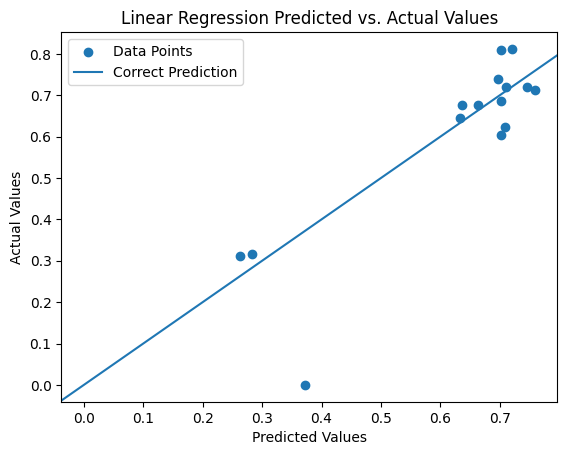

In [299]:
make_scatterplot(lin_pred, title='Linear Regression')

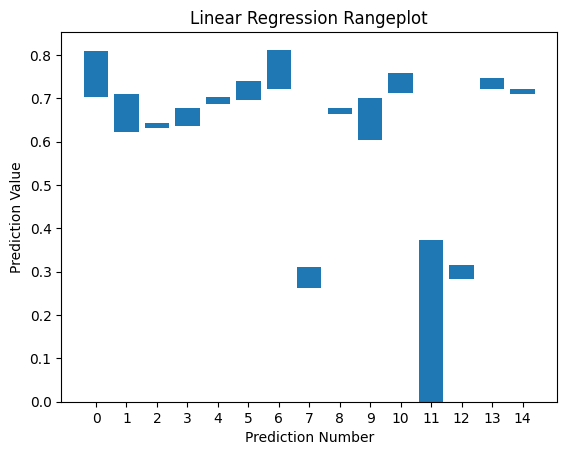

In [300]:
make_rangeplot(lin_pred, y_test, 'Linear Regression', axs=plt.gca())

### Gradient Boosting Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#:~:text=Gradient%20Boosting%20for%20regression.,of%20the%20given%20loss%20function.

In [301]:
# Run GBR on data
from sklearn.ensemble import GradientBoostingRegressor

grad_boosting_model = GradientBoostingRegressor()

grad_boosting_model.fit(X_train, y_train)

grad_pred = grad_boosting_model.predict(X_test)

print_stats(grad_pred)

########## Regression Metrics #########
Mean Squared Error:		0.00582
Mean Absolute Error:		0.05621

Coefficient of Determination:   0.87451
#######################################


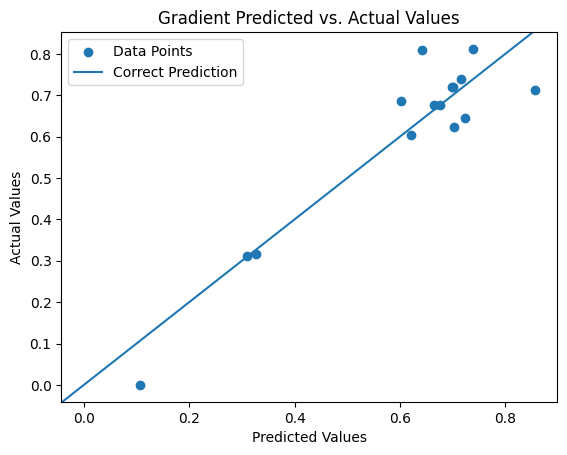

In [302]:
make_scatterplot(grad_pred, y_test, 'Gradient')

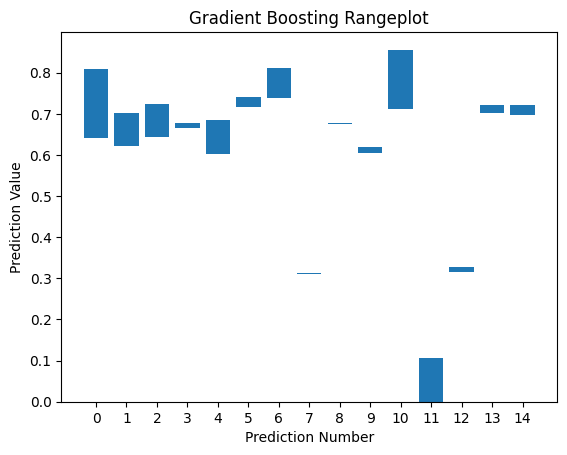

In [303]:
make_rangeplot(grad_pred, y_test, 'Gradient Boosting', axs=plt.gca())

### Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [304]:
# Run Random Forest Regression on data
from sklearn.ensemble import RandomForestRegressor

rand_forest_model = RandomForestRegressor()

rand_forest_model.fit(X_train, y_train)

rand_forest_pred = rand_forest_model.predict(X_test)

print_stats(rand_forest_pred)

########## Regression Metrics #########
Mean Squared Error:		0.00687
Mean Absolute Error:		0.05824

Coefficient of Determination:   0.85176
#######################################


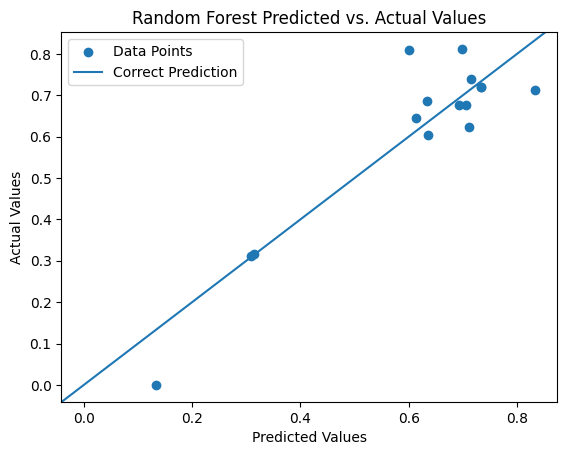

In [305]:
make_scatterplot(rand_forest_pred, title='Random Forest')

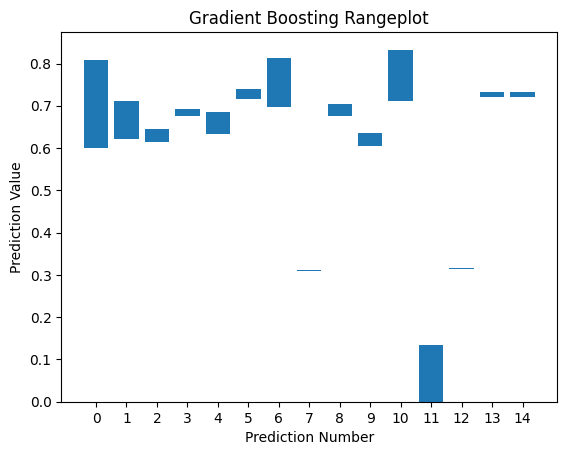

In [306]:
make_rangeplot(rand_forest_pred, title='Gradient Boosting', axs=plt.gca())

# Summary

Method to undo fit_transform to get actual egg predictions

In [307]:
# Returns actual predictions, with the pipeline scaling undone
def undo_scaling(scaled_values:np.ndarray) -> np.ndarray:
    reshaped = np.reshape(scaled_values, (-1,1))
    sc = num_pipeline[1]    # Gets the applied scalar from the pipeline
    sc = MinMaxScaler().fit(np.reshape(eggs['Total_egg_production'], (-1,1)))
    return sc.inverse_transform(reshaped).flatten().astype(np.int64)

In [308]:
# Descaling each values from our predictions
act_values = undo_scaling(y_test)
lin_pred_values = undo_scaling(lin_pred)
grad_pred_values = undo_scaling(grad_pred)
rand_forest_pred_values = undo_scaling(rand_forest_pred)

In [309]:
# Making a more detailed rangeplot for random forest
import plotly.graph_objects as go

df = pd.DataFrame({'PredictionNum': np.arange(0, len(rand_forest_pred_values), 1),
                   'Prediction': rand_forest_pred_values,
                   'Actual': act_values})

w_lbl = list(map(lambda x: str(x), df['Prediction']))
m_lbl = list(map(lambda x: str(x), df['Actual']))

fig = go.Figure()

for i in range(0, len(df)):

    fig.add_trace(go.Scatter(x = np.linspace(df['Prediction'][i], df['Actual'][i], 1000),
                             y = 1000*[df['PredictionNum'][i]],
                             mode = 'markers',
                             marker = {'color': np.linspace(df['Prediction'][i], df['Actual'][i], 1000),
                                       'colorscale': ['#E1A980', '#8DAEA6'],
                                       'size': 8}))

fig.add_trace(go.Scatter(x = df['Prediction'],
                         y = df['PredictionNum'],
                         marker = dict(color = '#CC5600', size = 14),
                         mode = 'markers',
                         text = w_lbl,
                         textposition = 'middle left',
                         textfont = {'color': '#CC5600'},
                         name = 'Prediction'))

fig.add_trace(go.Scatter(x = df['Actual'],
                         y = df['PredictionNum'],
                         marker = dict(color = '#237266', size = 14),
                         mode = 'markers',
                         text = m_lbl,
                         textposition = 'middle right',
                         textfont = {'color': '#237266'},
                         name = 'Actual'))

pred = df.iloc[-1, df.columns.get_loc('Prediction')]
act = df.iloc[-1, df.columns.get_loc('Actual')]
x = 0

if(pred > act):
    x += 35
else:
    x -= 35

fig.add_annotation(x = df.iloc[-1, df.columns.get_loc('Prediction')] + x,
                   y = df.iloc[-1, df.columns.get_loc('PredictionNum')],
                   text = 'Prediction',
                   font = {'color': '#CC5600',
                           'size': 15},
                   showarrow = False)

fig.add_annotation(x = df.iloc[-1, df.columns.get_loc('Actual')] - x,
                   y = df.iloc[-1, df.columns.get_loc('PredictionNum')],
                   text = 'Actual',
                   font = {'color': '#237266',
                           'size': 15},
                   showarrow = False)

fig.update_layout(title = "Prediction Inaccuracy Range Plot",
                  xaxis_title="Number of Eggs", yaxis_title="Prediction Number",
                  showlegend = False)

fig.show()

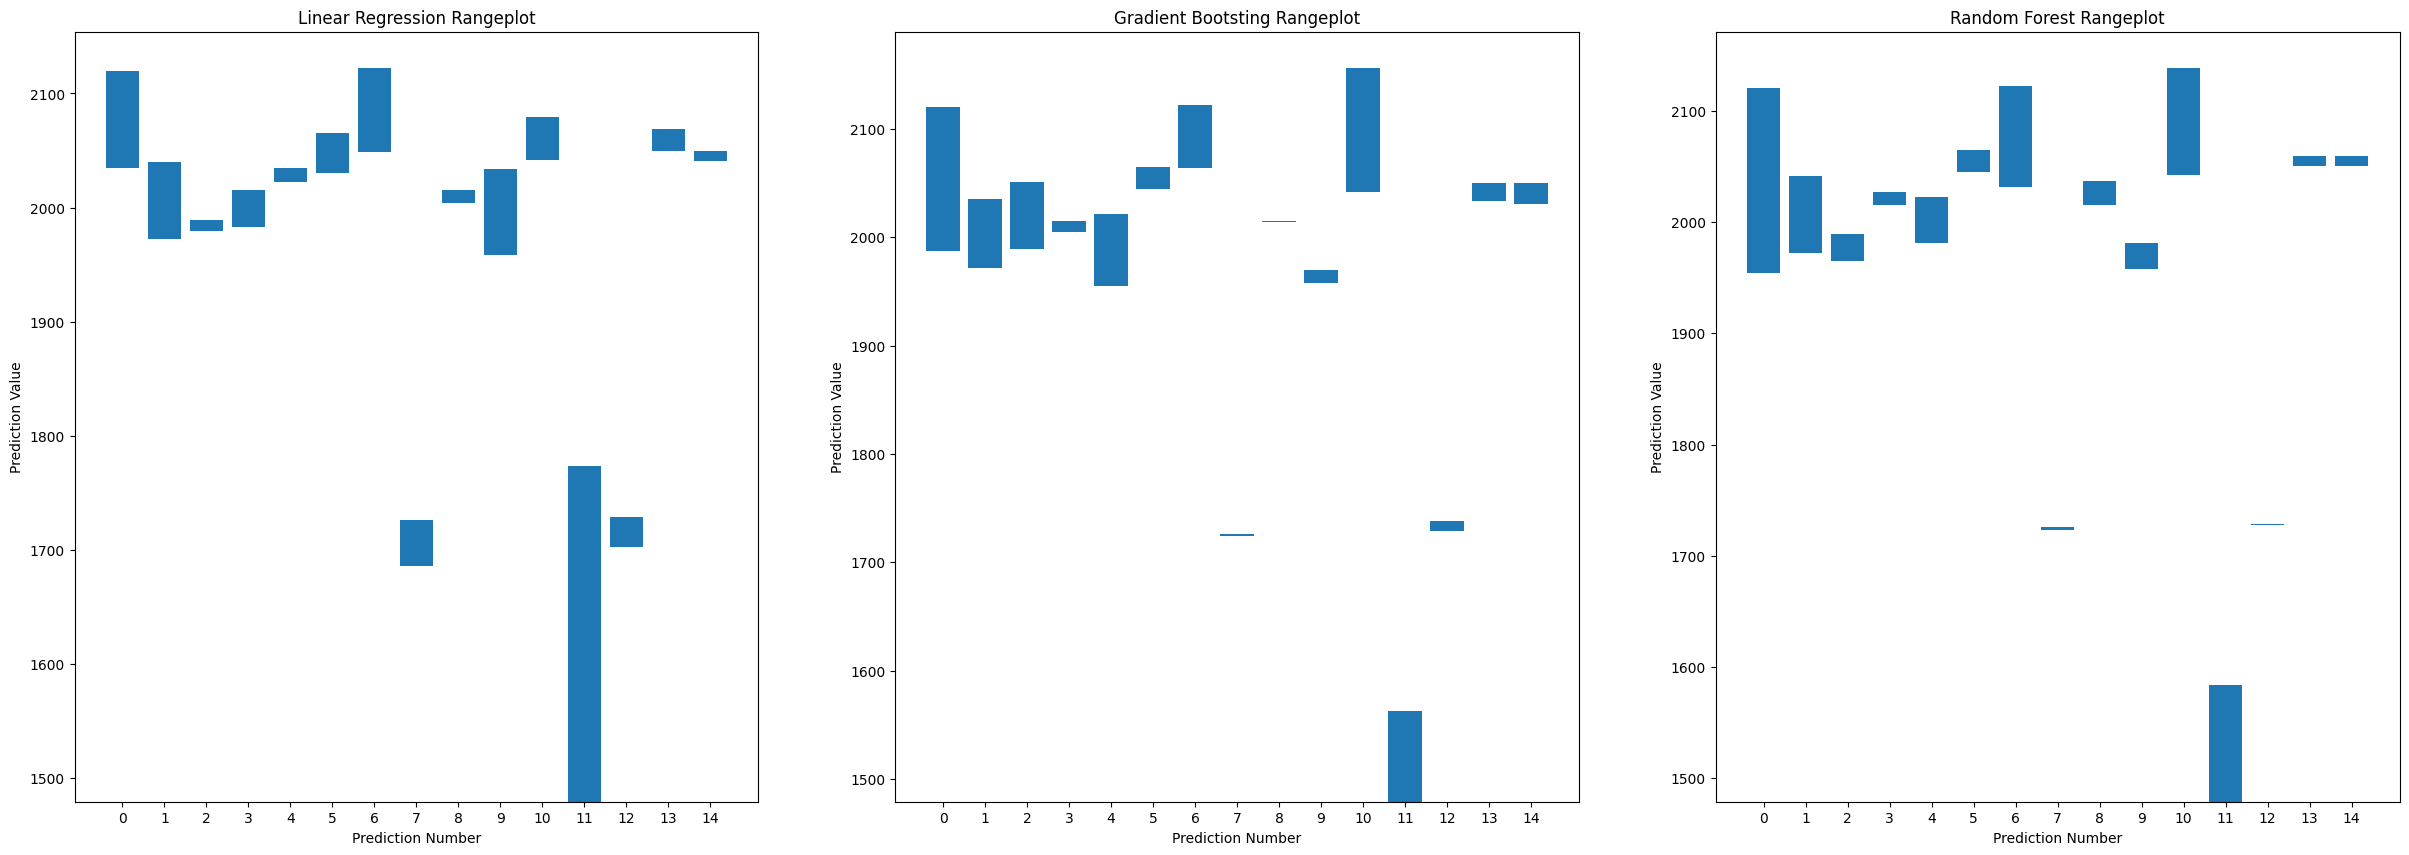

In [310]:
# Side-by-side view of the three models
fig, axs = plt.subplots(1, 3, figsize=(30,10))
make_rangeplot(lin_pred_values, act_values, 'Linear Regression', axs=axs[0])
make_rangeplot(grad_pred_values, act_values, 'Gradient Bootsting', axs=axs[1])
make_rangeplot(rand_forest_pred_values, act_values, 'Random Forest', axs=axs[2])

In [311]:
# Print MSE, MAE, and Coefficients of each algorithm.
print('\t    Linear Regression')
print_stats(lin_pred)
print('\n\t    Gradient Boosting')
print_stats(grad_pred)
print('\n\t     Random Forest')
print_stats(rand_forest_pred)

	    Linear Regression
########## Regression Metrics #########
Mean Squared Error:		0.01236
Mean Absolute Error:		0.06956

Coefficient of Determination:   0.73336
#######################################

	    Gradient Boosting
########## Regression Metrics #########
Mean Squared Error:		0.00582
Mean Absolute Error:		0.05621

Coefficient of Determination:   0.87451
#######################################

	     Random Forest
########## Regression Metrics #########
Mean Squared Error:		0.00687
Mean Absolute Error:		0.05824

Coefficient of Determination:   0.85176
#######################################


```
      ,~.
    ,-'__ `-,
   {,-'  `. }              ,')
  ,( a )   `-.__         ,',')~,
 <=.) (         `-.__,==' ' ' '}
   (   )                      /
    `-'\   ,                  )
        |  \   hjw  `~.      /
        \   `._        \    /
         \     `._____,'   /
          `-.            ,'
             `-.      ,-' _--_  
                `~~~~'   /    \   
                //_||   |      |  
             __//--'/`   \____/   
           ,--'/`  '
              '
```